### Logistic Regression with Pytorch using CPU and GPU

- Logistic regression is a classification algorithm
- input is numeric values
- output is a probability between 0 and 1
- cross entropy loss is used for the cost function
- ex: spam or not

<img src="images/1.png" width="300" height="100">

### Problem

- MNIST Hand written data set
- Handwritten number recognition

<img src="images/2.png" width="300" height="100">

### Import Libraries

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import collections
import matplotlib.pyplot as plt
import numpy as np

### Load Datasets

In [2]:
# Get the training data set, train=True
# Make sure data is tesnor, transform=transforms.ToTensor()
# download if doesn't exist, download=True
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

In [3]:
# number of samples in the data set
len(train_dataset)

60000

In [4]:
# first element of the tupple is the image
train_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [5]:
# size of the image
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [6]:
# second element of the tupple is the label
train_dataset[0][1]

5

In [7]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

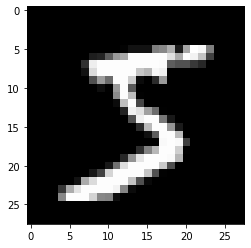

In [8]:
# cisualize the image
img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(img, cmap='gray')

In [9]:
# load the testing dataset
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [10]:
test_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
test_dataset[0][1]

7

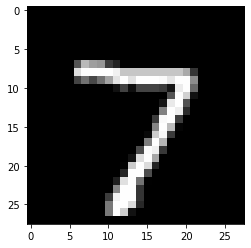

In [12]:
# cisualize the image
img = test_dataset[0][0].numpy().reshape(28,28)
plt.imshow(img, cmap='gray')

In [13]:
batch_size = 100
epochs = 20

In [14]:
accuracy_list = []
epoch_list = []
for i in range(0,epochs):
    epoch_list.append(i)

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [16]:
isinstance(train_loader, collections.Iterable)

True

In [17]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
isinstance(test_loader, collections.Iterable)

True

### Build Model

In [19]:
class LogisticRegressionModel(nn.Module):
    def __init__ (self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [20]:
# input dimentiosn 28x28=784
# output dimentiosn 10x10

input_dim = 784
output_dim = 10

In [21]:
use_cuda = True

In [22]:
model = LogisticRegressionModel(input_dim, output_dim)

In [23]:
# move the model to GPU
if torch.cuda.is_available() and use_cuda:
    model.cuda()

In [24]:
loss_function = nn.CrossEntropyLoss()

In [25]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
def calcuateAccuracy():
    correct = 0
    total = 0
        
    for images, labels in test_loader:
        # get all the images in the training data set
        if torch.cuda.is_available() and use_cuda:
            #move torch tensors to the GPU
            images = Variable(images.view(-1, 784).cuda())
        else:
            images = Variable(images.view(-1, 784))
        
        # get all the predictions for each class using the model
        all_predictions = model(images)
            
        # highest is the final prediction
        _, predictions = torch.max(all_predictions.data, 1)
       
        # total number of samples
        total = total + labels.size(0)
            
        # corrrect prediction
        # compare prediction with labels element wise
        # sum returned tensor (it has True/1 or False/0 in it)
        if torch.cuda.is_available() and use_cuda:
            correct = correct + (predictions.cpu() == labels.cpu()).sum()
        else:
            correct = correct + (predictions == labels).sum()
        
        correct_np = correct.numpy()
            
    accuracy = 100 * correct_np / total;
    print("accuracy: " + str(accuracy))
    return accuracy

In [27]:
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get a batch of images and labels
        if torch.cuda.is_available() and use_cuda:
            #move torch tensors to the GPU
            images = Variable(images.view(-1, 784).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 784))
            labels = Variable(labels)
        
        # set gradients to 0
        optimizer.zero_grad()
        
        # get predictions for the batch
        predictions = model(images)
        
        # calculate loss
        loss = loss_function(predictions, labels)
        
        # calculate the gradients
        loss.backward()
        
        # update the weights
        optimizer.step()
        
    accuracy = calcuateAccuracy()
    accuracy_list.append(accuracy)

accuracy: 69.9
accuracy: 76.77
accuracy: 79.7
accuracy: 81.32
accuracy: 82.31
accuracy: 83.23
accuracy: 83.82
accuracy: 84.38
accuracy: 84.78
accuracy: 85.17
accuracy: 85.65
accuracy: 85.96
accuracy: 86.15
accuracy: 86.33
accuracy: 86.44
accuracy: 86.66
accuracy: 86.8
accuracy: 86.95
accuracy: 87.17
accuracy: 87.27


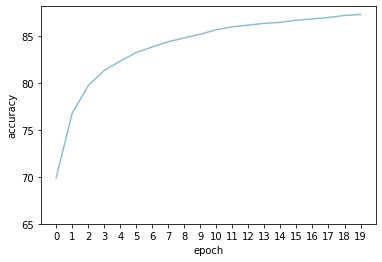

In [28]:
plt.clf()
plt.plot(epoch_list, accuracy_list, '-', alpha=0.5)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xticks(epoch_list) 
plt.yticks(np.arange(min(accuracy_list)-min(accuracy_list)%5, max(accuracy_list), 5)) 
plt.show()

In [29]:
# model.load_state_dict(torch.load("logistic_regression_model.pkl"))
torch.save(model.state_dict(), 'logistic_regression_model.pkl')